In [25]:
import pandas as pd
import numpy as np
import requests
import json
import os
from matplotlib import pyplot as plt
from scipy.stats import linregress
from config import username, api_key
from city_list import slist, clist, alist

In [26]:
city_path = os.path.join("Data","combined_data.csv")
df = pd.read_csv(city_path)
df

,city,state,mean site eui,mean site eui res,mean source eui,mean source eui res,mean fuel eui,mean fuel eui res,mean electric eui,mean electric eui res,CDD,HDD,Tavg,Trange,Tmax,Tmin,Prcp,Snow
0,Birmingham,AL,143.647642,50.020103,400.595034,96.557022,25.618049,NaN,143.311563,21.116271,1933,2770,62.78,22.46,73.94,51.44,5712,8
1,Mobile,AL,107.084979,50.998702,315.907443,117.940363,10.227344,NaN,120.403278,30.169515,2537,1656,67.46,18.68,76.64,58.10,6528,2
2,Montgomery,AL,112.048215,NaN,298.702917,NaN,24.801954,NaN,104.782978,NaN,2113,2278,64.58,23.54,76.28,52.88,5280,0
3,Huntsville,AL,116.235841,NaN,362.019120,NaN,32.382384,NaN,140.163935,27.781260,1540,3517,59.54,23.90,71.42,47.66,5582,24
4,Tuscaloosa,AL,189.021112,NaN,514.514461,NaN,36.074106,NaN,160.009627,NaN,2348,2338,64.94,22.64,76.28,53.78,5046,2
5,Anchorage,AK,133.111653,55.616592,270.506011,86.474614,66.884246,NaN,90.755170,13.434063,3,10201,37.04,14.00,44.06,30.02,1667,821
6,Juneau,AK,89.367785,NaN,169.524359,NaN,NaN,NaN,33.031979,NaN,-7777,9302,39.56,10.94,44.96,33.98,11687,823
7,Phoenix,AZ,66.839636,34.146045,200.353735,95.292175,4.228576,5.881798,76.588709,26.895603,3741,1359,71.42,34.34,88.70,54.32,876,0
8,Mesa,AZ,90.427591,30.461339,278.819932,95.648604,2.630878,0.000000,123.888037,30.461339,3592,1462,70.88,27.68,84.56,57.02,943,0
9,Tucson,AZ,111.380086,32.412979,331.288908,84.472751,8.777518,9.298245,119.370537,24.753733,1946,2486,63.50,37.22,82.04,44.96,1390,23


In [27]:
df2 = df[(df["CDD"] >= 0) & (df["HDD"] >= 0)]
df2

,city,state,mean site eui,mean site eui res,mean source eui,mean source eui res,mean fuel eui,mean fuel eui res,mean electric eui,mean electric eui res,CDD,HDD,Tavg,Trange,Tmax,Tmin,Prcp,Snow
0,Birmingham,AL,143.647642,50.020103,400.595034,96.557022,25.618049,NaN,143.311563,21.116271,1933,2770,62.78,22.46,73.94,51.44,5712,8
1,Mobile,AL,107.084979,50.998702,315.907443,117.940363,10.227344,NaN,120.403278,30.169515,2537,1656,67.46,18.68,76.64,58.10,6528,2
2,Montgomery,AL,112.048215,NaN,298.702917,NaN,24.801954,NaN,104.782978,NaN,2113,2278,64.58,23.54,76.28,52.88,5280,0
3,Huntsville,AL,116.235841,NaN,362.019120,NaN,32.382384,NaN,140.163935,27.781260,1540,3517,59.54,23.90,71.42,47.66,5582,24
4,Tuscaloosa,AL,189.021112,NaN,514.514461,NaN,36.074106,NaN,160.009627,NaN,2348,2338,64.94,22.64,76.28,53.78,5046,2
5,Anchorage,AK,133.111653,55.616592,270.506011,86.474614,66.884246,NaN,90.755170,13.434063,3,10201,37.04,14.00,44.06,30.02,1667,821
7,Phoenix,AZ,66.839636,34.146045,200.353735,95.292175,4.228576,5.881798,76.588709,26.895603,3741,1359,71.42,34.34,88.70,54.32,876,0
8,Mesa,AZ,90.427591,30.461339,278.819932,95.648604,2.630878,0.000000,123.888037,30.461339,3592,1462,70.88,27.68,84.56,57.02,943,0
9,Tucson,AZ,111.380086,32.412979,331.288908,84.472751,8.777518,9.298245,119.370537,24.753733,1946,2486,63.50,37.22,82.04,44.96,1390,23
10,Yuma,AZ,89.963936,43.328682,275.588443,129.802519,2.726742,3.322212,139.602654,40.368228,3811,1129,72.32,29.84,87.26,57.38,368,0


In [28]:
df3 = df2.sort_values(by=['mean site eui']).head(10)
df3

,city,state,mean site eui,mean site eui res,mean source eui,mean source eui res,mean fuel eui,mean fuel eui res,mean electric eui,mean electric eui res,CDD,HDD,Tavg,Trange,Tmax,Tmin,Prcp,Snow
47,Hilo,HI,52.965748,NaN,166.312195,NaN,0.000000,NaN,74.732570,NaN,1028,153,67.46,15.44,75.20,59.54,24002,0
60,Des Moines,IA,58.662125,45.780388,140.374875,85.833988,21.919636,27.711210,41.705014,18.069177,947,6587,49.46,22.46,60.62,38.30,3609,275
46,Honolulu,HI,58.847680,20.101995,175.626742,57.860299,4.678788,2.516491,88.296732,17.574633,3954,1,75.74,16.34,84.02,67.64,5869,0
50,Pocatello,ID,58.982009,NaN,143.322043,NaN,17.454739,NaN,35.927140,NaN,240,7640,44.78,28.04,58.82,30.56,1127,290
18,San Diego,CA,60.451393,32.116250,145.160327,62.232609,21.450765,18.474799,52.791774,13.641363,1241,1909,63.14,21.92,74.12,52.16,1677,1
145,Dickinson,ND,61.022971,NaN,176.351027,NaN,4.255631,NaN,56.391573,NaN,400,8842,41.90,26.96,55.40,28.40,1671,343
131,Roswell,NM,62.615389,NaN,174.749274,NaN,10.522147,NaN,57.611744,NaN,1508,3810,58.64,37.40,77.36,39.92,1426,52
63,Sioux City,IA,63.865488,NaN,128.239056,NaN,34.601463,NaN,29.277402,NaN,870,6863,48.56,22.64,59.90,37.22,3134,334
17,San Francisco,CA,64.640986,40.110887,158.428255,64.415370,16.371552,31.042033,62.009912,11.273363,174,2701,58.10,19.40,67.82,48.38,2674,0
22,Fort Collins,CO,65.148913,36.452121,130.824530,89.902512,33.549288,11.749832,29.391001,24.702289,250,7381,45.32,22.64,56.66,34.16,2162,1661


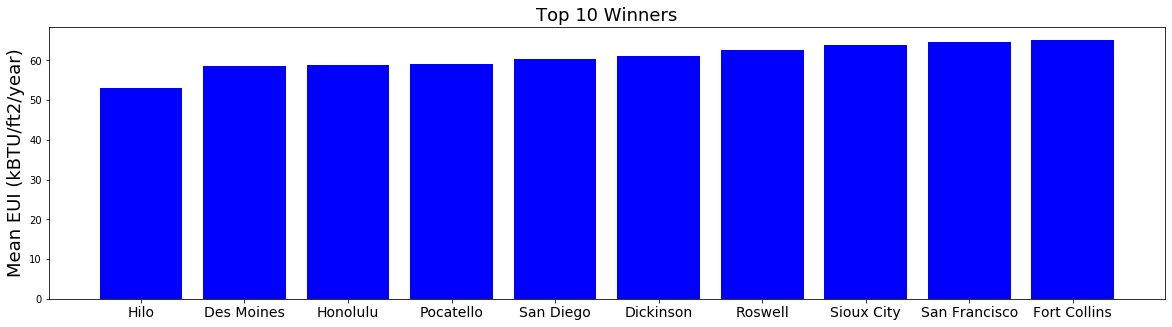

In [29]:
x = df3["city"]
y = df3["mean site eui"]
x_axis = np.arange(len(y))
plt.figure(figsize=(20,5))
plt.bar(x_axis, y, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x, fontsize=14)
plt.title("Top 10 Winners",fontsize=18)
plt.ylabel("Mean EUI (kBTU/ft2/year)",fontsize=18)
plt.savefig(os.path.join("Data","plotscom","bottomfive.png"))
plt.show()

In [30]:
df4 = df2.sort_values(by=['mean site eui'],ascending=False).head(10)
df4

,city,state,mean site eui,mean site eui res,mean source eui,mean source eui res,mean fuel eui,mean fuel eui res,mean electric eui,mean electric eui res,CDD,HDD,Tavg,Trange,Tmax,Tmin,Prcp,Snow
169,Spartanburg,SC,234.344590,NaN,582.818085,NaN,81.742440,NaN,174.500613,NaN,1401,3712,58.64,27.50,72.32,44.96,4980,4
4,Tuscaloosa,AL,189.021112,NaN,514.514461,NaN,36.074106,NaN,160.009627,NaN,2348,2338,64.94,22.64,76.28,53.78,5046,2
58,South Bend,IN,179.974010,NaN,456.784854,NaN,52.467472,NaN,137.094637,NaN,628,6622,48.56,21.92,59.54,37.58,4008,600
59,Evansville,IN,179.003723,NaN,466.875734,NaN,47.303967,NaN,143.133535,NaN,1403,4402,56.84,21.02,67.28,46.22,4879,122
57,Fort Wayne,IN,168.422111,40.711039,410.926781,78.020845,56.943958,23.732056,116.595434,16.836652,809,6102,50.54,19.76,60.26,40.64,3719,264
97,Ann Arbor,MI,157.212186,NaN,354.578211,NaN,62.953671,NaN,93.074870,NaN,524,6588,48.38,19.58,58.28,38.66,3591,573
55,Elgin,IL,153.032929,49.426806,379.687723,77.843383,53.014289,40.454403,103.629410,12.863296,649,6929,47.84,18.14,56.84,38.66,3817,349
65,Wichita,KS,150.958321,290.193758,394.396547,345.147943,39.060595,270.714636,119.616527,19.743662,1573,4650,56.66,23.18,68.18,44.96,3596,129
160,Harrisburg,PA,150.824440,63.430675,344.776289,130.109705,50.859954,32.708528,92.115913,30.758218,805,5421,52.34,22.10,63.32,41.36,4352,176
175,Nashville,TN,150.726955,44.141701,393.698218,125.657712,38.638368,6.170401,121.826163,37.950456,1332,4107,57.38,24.62,69.62,45.14,5267,18


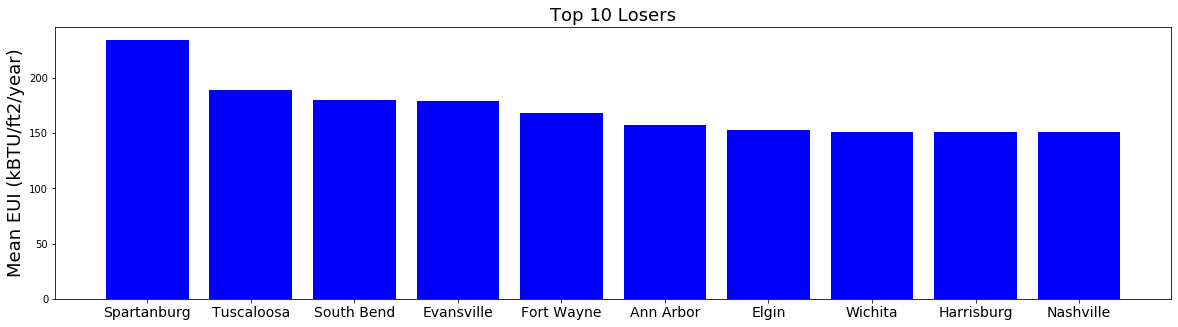

In [31]:
x = df4["city"]
y = df4["mean site eui"]
x_axis = np.arange(len(y))
plt.figure(figsize=(20,5))
plt.bar(x_axis, y, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x, fontsize=14)
plt.title("Top 10 Losers",fontsize=18)
plt.ylabel("Mean EUI (kBTU/ft2/year)",fontsize=18)
plt.savefig(os.path.join("Data","plotscom","topfive.png"))
plt.show()

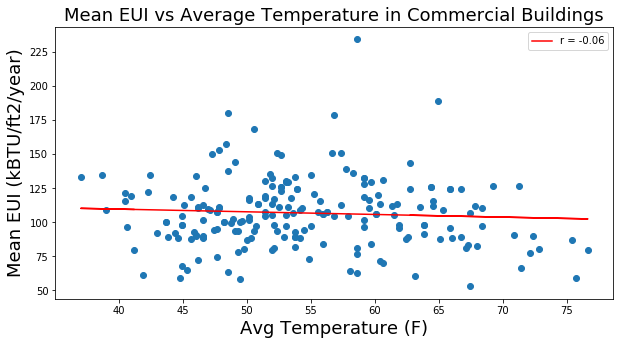

Slope = -0.195569621365415
r = -0.06436192603757977


In [32]:
x = df2["Tavg"]
y = df2["mean site eui"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean EUI vs Average Temperature in Commercial Buildings",fontsize=18)
plt.ylabel("Mean EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Avg Temperature (F)",fontsize=18)
plt.savefig(os.path.join("Data","plotscom","Tavg.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")


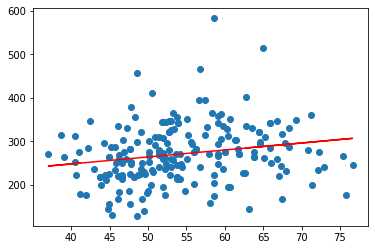

Slope = 1.6065695330987515
r = 0.1993750787791402


In [9]:
x = df2["Tavg"]
y = df2["mean source eui"]

plt.scatter(x,y)

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.plot(x, m * x + b, color="red") 

plt.savefig(os.path.join("Data","plotscom","Tavgsource.png"))
plt.show()
print(f"Slope = {m}")
r = stats.rvalue
print(f"r = {r}")


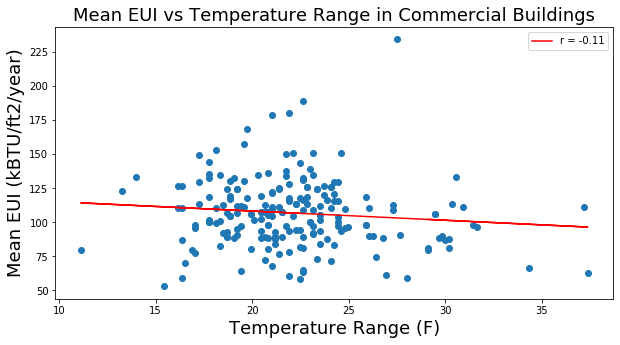

Slope = -0.6757590417475312
r = -0.10704182317129432


In [33]:
x = df2["Trange"]
y = df2["mean site eui"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean EUI vs Temperature Range in Commercial Buildings",fontsize=18)
plt.ylabel("Mean EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Temperature Range (F)",fontsize=18)
plt.savefig(os.path.join("Data","plotscom","Trange.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")


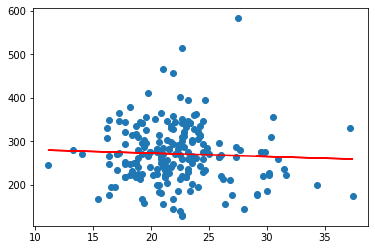

Slope = -0.7714259903592288
r = -0.0460786351908663


In [11]:
x = df2["Trange"]
y = df2["mean source eui"]

plt.scatter(x,y)

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.plot(x, m * x + b, color="red") 

plt.savefig(os.path.join("Data","plotscom","Trangesource.png"))
plt.show()
print(f"Slope = {m}")
r = stats.rvalue
print(f"r = {r}")

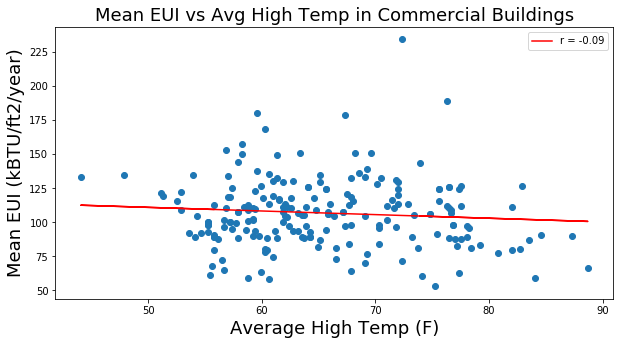

Slope = -0.26636647745322245
r = -0.08926928617749848


In [34]:
x = df2["Tmax"]
y = df2["mean site eui"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean EUI vs Avg High Temp in Commercial Buildings",fontsize=18)
plt.ylabel("Mean EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Average High Temp (F)",fontsize=18)
plt.savefig(os.path.join("Data","plotscom","Tmax.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")


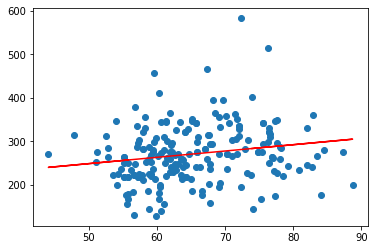

Slope = 1.4519004320787334
r = 0.18348604402208854


In [13]:
x = df2["Tmax"]
y = df2["mean source eui"]

plt.scatter(x,y)

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.plot(x, m * x + b, color="red") 

plt.savefig(os.path.join("Data","plotscom","Tmaxsource.png"))
plt.show()
print(f"Slope = {m}")
r = stats.rvalue
print(f"r = {r}")

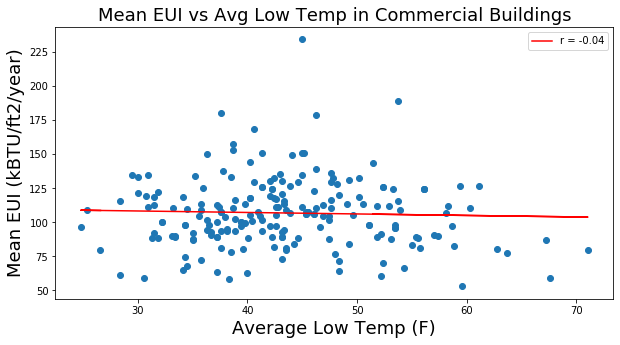

Slope = -0.10910629814692446
r = -0.03723530967378718


In [35]:
x = df2["Tmin"]
y = df2["mean site eui"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean EUI vs Avg Low Temp in Commercial Buildings",fontsize=18)
plt.ylabel("Mean EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Average Low Temp (F)",fontsize=18)
plt.savefig(os.path.join("Data","plotscom","Tmin.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")

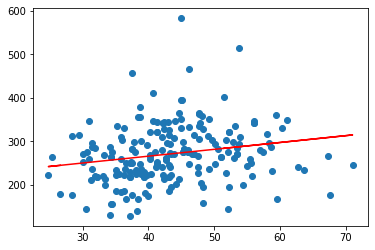

Slope = 1.573113868776794
r = 0.20244591471672807


In [15]:
x = df2["Tmin"]
y = df2["mean source eui"]

plt.scatter(x,y)

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.plot(x, m * x + b, color="red") 

plt.savefig(os.path.join("Data","plotscom","Tminsource.png"))
plt.show()
print(f"Slope = {m}")
r = stats.rvalue
print(f"r = {r}")

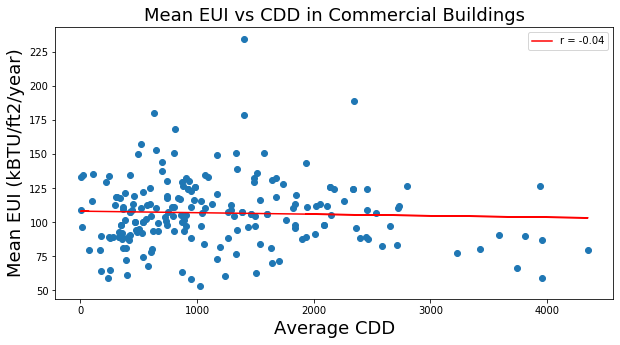

Slope = -0.001118057744915303
r = -0.03955333778993356


In [36]:
x = df2["CDD"]
y = df2["mean site eui"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean EUI vs CDD in Commercial Buildings",fontsize=18)
plt.ylabel("Mean EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Average CDD",fontsize=18)
plt.savefig(os.path.join("Data","plotscom","CDD.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")

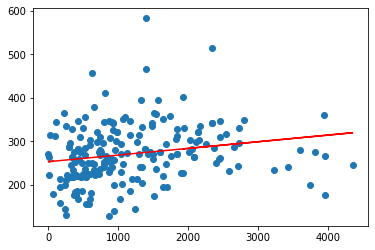

Slope = 0.01531886931221331
r = 0.20435690810739707


In [17]:
x = df2["CDD"]
y = df2["mean source eui"]

plt.scatter(x,y)

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.plot(x, m * x + b, color="red") 

plt.savefig(os.path.join("Data","plotscom","CDDsource.png"))
plt.show()
print(f"Slope = {m}")
r = stats.rvalue
print(f"r = {r}")

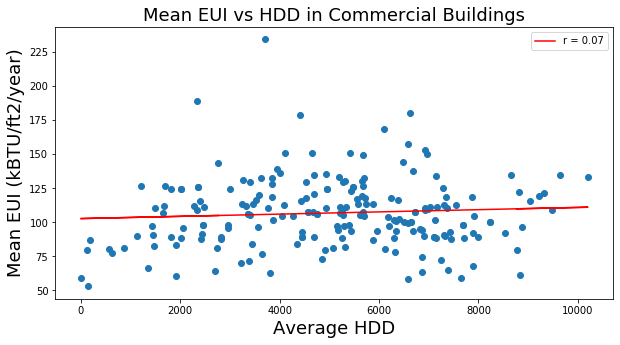

Slope = 0.0008176347744407328
r = 0.07225379410538597


In [37]:
x = df2["HDD"]
y = df2["mean site eui"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean EUI vs HDD in Commercial Buildings",fontsize=18)
plt.ylabel("Mean EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Average HDD",fontsize=18)
plt.savefig(os.path.join("Data","plotscom","HDD.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")

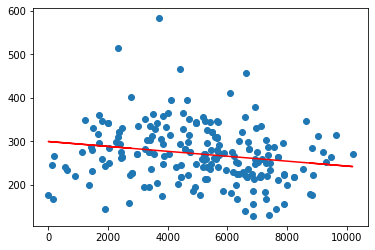

Slope = -0.005646346956893998
r = -0.18815361751100468


In [19]:
x = df2["HDD"]
y = df2["mean source eui"]

plt.scatter(x,y)

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.plot(x, m * x + b, color="red") 

plt.savefig(os.path.join("Data","plotscom","HDDsource.png"))
plt.show()
print(f"Slope = {m}")
r = stats.rvalue
print(f"r = {r}")

In [42]:
df3 = df2.dropna(axis=0,subset=["mean fuel eui"])

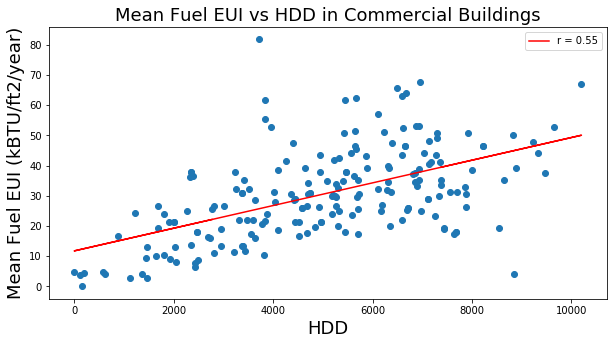

Slope = 0.003752749475089003
r = 0.5538417256024896


In [43]:
x = df3["HDD"]
y = df3["mean fuel eui"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean Fuel EUI vs HDD in Commercial Buildings",fontsize=18)
plt.ylabel("Mean Fuel EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("HDD",fontsize=18)
plt.savefig(os.path.join("Data","plotscom","FuelHDD.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")

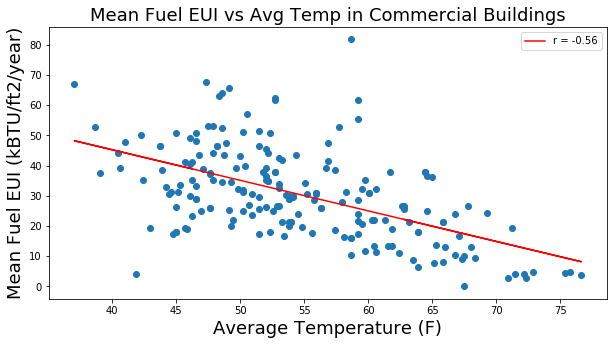

Slope = -1.011383724040483
r = -0.5564572729649027


In [44]:
x = df3["Tavg"]
y = df3["mean fuel eui"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean Fuel EUI vs Avg Temp in Commercial Buildings",fontsize=18)
plt.ylabel("Mean Fuel EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Average Temperature (F)",fontsize=18)
plt.savefig(os.path.join("Data","plotscom","TavgFuel.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")

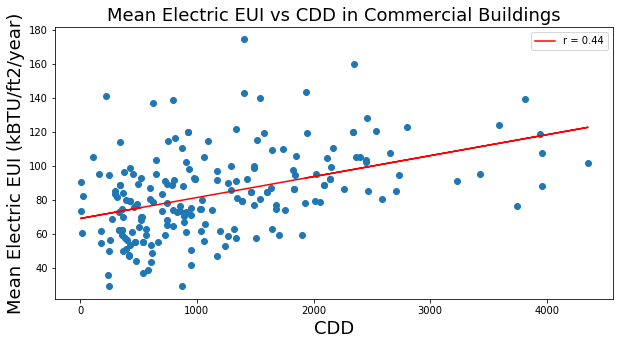

Slope = 0.01231638723985524
r = 0.43501534327460945


In [45]:
x = df3["CDD"]
y = df3["mean electric eui"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean Electric EUI vs CDD in Commercial Buildings",fontsize=18)
plt.ylabel("Mean Electric EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("CDD",fontsize=18)
plt.savefig(os.path.join("Data","plotscom","ElecCDD.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")

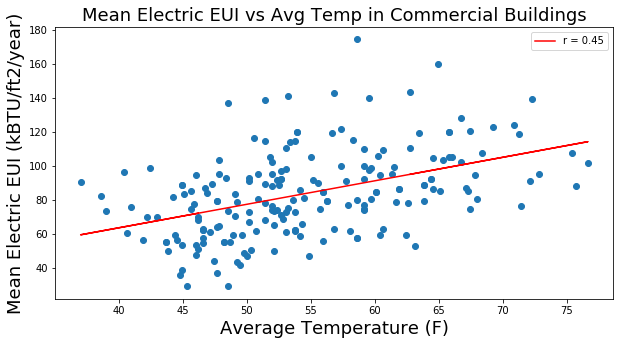

Slope = 1.3820658881872225
r = 0.4513313299207941


In [46]:
x = df3["Tavg"]
y = df3["mean electric eui"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean Electric EUI vs Avg Temp in Commercial Buildings",fontsize=18)
plt.ylabel("Mean Electric EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Average Temperature (F)",fontsize=18)
plt.savefig(os.path.join("Data","plotscom","TavgElec.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")